<a href="https://colab.research.google.com/github/SilviaNeves/Mini-Wiki-Silvia/blob/main/C%C3%B3pia_de_Colab_to_bucket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magazine Capivara

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRUfEdewXhUlGYJlwHt-0qXibGxsAoA9-h1Vy5FZioDgtbyWVLviXb1Qq8W1kFvb_XwmOv7DltXTgIq/pub?gid=1202447174&single=true&output=csv')

In [5]:
df.head()

,Data,Receita,Custo,Lucro,Quantidade de Vendas,Novos Clientes,Categoria do Produto,Satisfação do Cliente,Região
0,2023-01-01,19352,6031,13321,76,8,Roupas,1,Oeste
1,2023-01-01,47585,29758,17827,7,13,Móveis,1,Leste
2,2023-01-02,36867,10699,26168,29,12,Eletrônicos,5,Sul
3,2023-01-02,30334,5471,24863,11,24,Brinquedos,5,Norte
4,2023-01-03,8644,4939,3705,33,1,Móveis,3,Norte


# Exercícios



**Exercício 1: Separação de Dados por Categoria de Produto**

Carregue o dataset fornecido utilizando Pandas.
Separe os dados em diferentes DataFrames, um para cada categoria de produto.
Salve os DataFrames em arquivos CSV e os envie para o bucket do GCP.
Dentro da bucket cria uma pasta chamada categoria para receber os dataframes



Arquivos CSV por categoria de produtos foram criados e salvos na pasta "categoria"


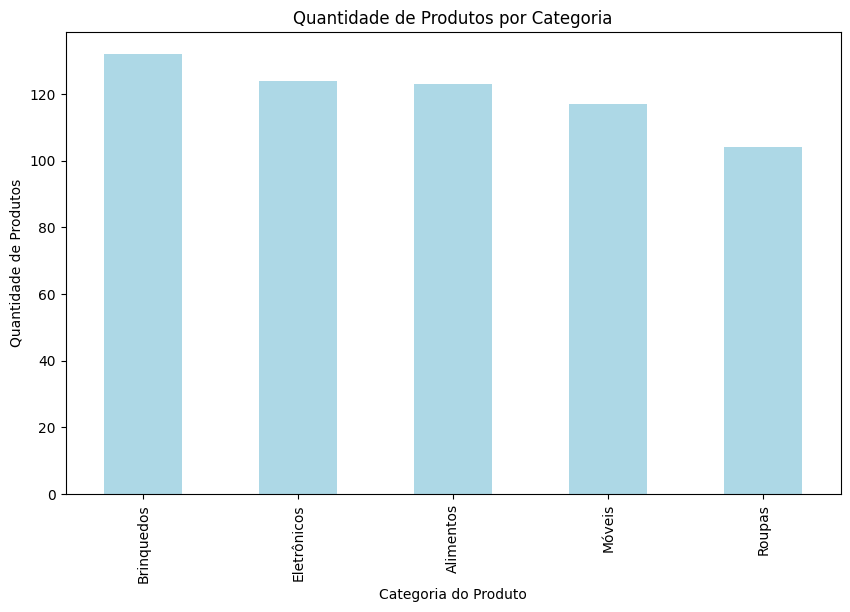

In [80]:
# Separar os dados em diferentes DataFrames por categoria de produto
categorias = df['Categoria do Produto'].unique()
for categoria in categorias:
  df_categoria = df[df['Categoria do Produto'] == categoria]

  # Salvar cada DataFrame em um arquivo CSV com o nome da categoria
  df_categoria.to_csv(f'{categoria}.csv', index=False)

# Confirmar a criação dos arquivos
print('Arquivos CSV por categoria de produtos foram criados e salvos na pasta "categoria"')


plt.figure(figsize=(10,6))
df['Categoria do Produto'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Quantidade de Produtos por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Produtos')
plt.show()

**Exercício 2: Identificação dos Produtos Mais Lucrativos**

Analise os dados para descobrir quais categorias de produtos geraram mais lucro total.
Crie um DataFrame contendo apenas os produtos com lucro total acima da média.
Salve este DataFrame e envie-o para a bucket do GCP.
Dentro da bucket cria uma pasta chamada lucros para receber os dataframes


Arquivo CSV contendo produtos com lucro total acima da média foi criado e salvo na pasta 'lucros'.


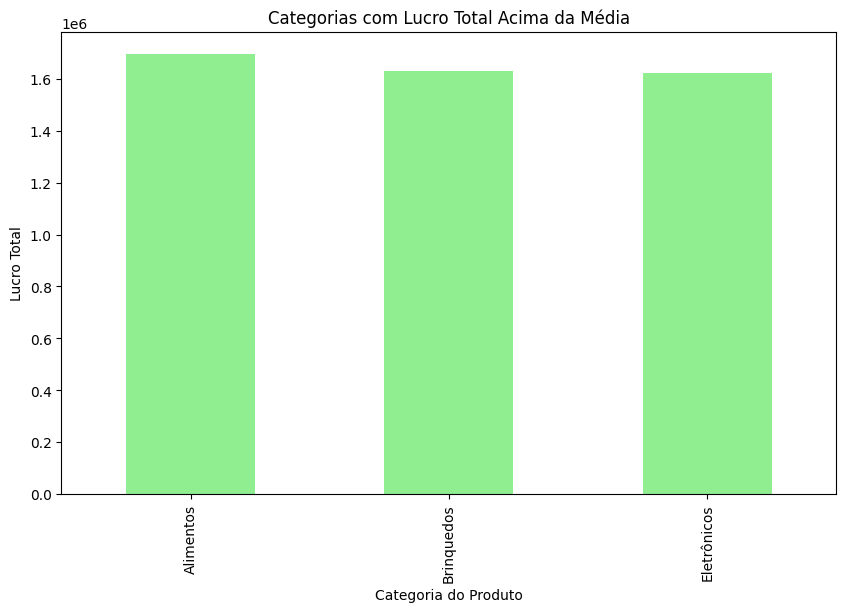

In [81]:
# Calcular o lucro total por categoria de produto
lucros_por_categoria = df.groupby('Categoria do Produto')['Lucro'].sum()

# Calcular a média dos lucros
media_lucros = lucros_por_categoria.mean()

# Filtrar categorias com lucro total acima da média
categorias_lucrativas = lucros_por_categoria[lucros_por_categoria > media_lucros]

# Criar DataFrame contendo apenas os produtos com lucro total acima da média
df_lucrativos = df[df['Categoria do Produto'].isin(categorias_lucrativas.index)]

# Salvar o DataFrame
df_lucrativos.to_csv('produtos_lucrativos.csv', index=False)

# Confirmar a criação do arquivo
print("Arquivo CSV contendo produtos com lucro total acima da média foi criado e salvo na pasta 'lucros'.")


plt.figure(figsize=(10,6))
categorias_lucrativas.plot(kind='bar', color='lightgreen')
plt.title('Categorias com Lucro Total Acima da Média')
plt.xlabel('Categoria do Produto')
plt.ylabel('Lucro Total')
plt.show()

**Exercício 3: Avaliação da Satisfação do Cliente**

Crie um DataFrame contendo apenas as vendas onde a Satisfação do Cliente foi 5.
Compare o faturamento médio dessas vendas com o faturamento médio geral.
Salve o resultado da análise e o DataFrame filtrado e envie para a bucket do GCP.
Dentro da bucket cria uma pasta chamada satisfacao para receber os dataframes



Arquivos CSV e de análise foram criados e salvos na pasta 'satisfacao'.


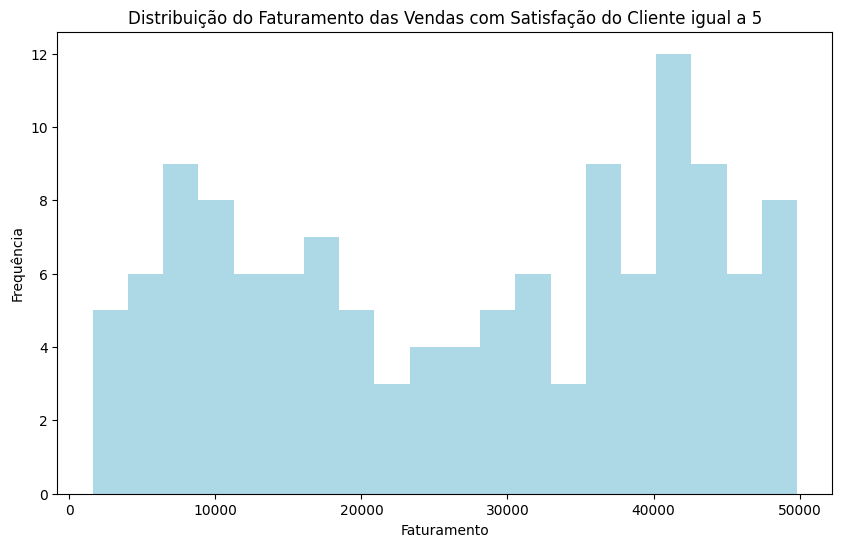

In [82]:
# Filtrar vendas com Satisfação do Cliente igual a 5
df_satisfacao5 = df[df['Satisfação do Cliente'] == 5]

# Calcular o faturamento médio dessas vendas
faturamento_medio_satisfacao5 = df_satisfacao5['Receita'].mean()

# Calcular o faturamento médio geral
faturamento_medio_geral = df['Receita'].mean()

# Salvar o DataFrame e o resultado da análise
df_satisfacao5.to_csv('[satisfacao]vendas_satisfacao5.csv', index=False)
with open('[satisfacao]analise_satisfacao.txt', 'w') as f:
    f.write(f"Faturamento médio das vendas com Satisfação do Cliente igual a 5: {faturamento_medio_satisfacao5}\n")
    f.write(f"Faturamento médio geral: {faturamento_medio_geral}\n")

# Confirmar a criação dos arquivos
print("Arquivos CSV e de análise foram criados e salvos na pasta 'satisfacao'.")

plt.figure(figsize=(10,6))
df_satisfacao5['Receita'].plot(kind='hist', bins=20, color='lightblue')
plt.title('Distribuição do Faturamento das Vendas com Satisfação do Cliente igual a 5')
plt.xlabel('Faturamento')
plt.ylabel('Frequência')
plt.show()

**Exercício 4: Análise por Região**

Crie DataFrames separados para cada região (Norte, Sul, Leste, Oeste).
Para cada região, calcule a soma do lucro e da quantidade de vendas.
Salve os resultados em um arquivo CSV e envie para a bucket do GCP.
Dentro da bucket cria uma pasta chamada região para receber os dataframes


Arquivos CSV por região e o arquivo de resultados foram criados e salvos na pasta 'regiao'.


<Figure size 1000x600 with 0 Axes>

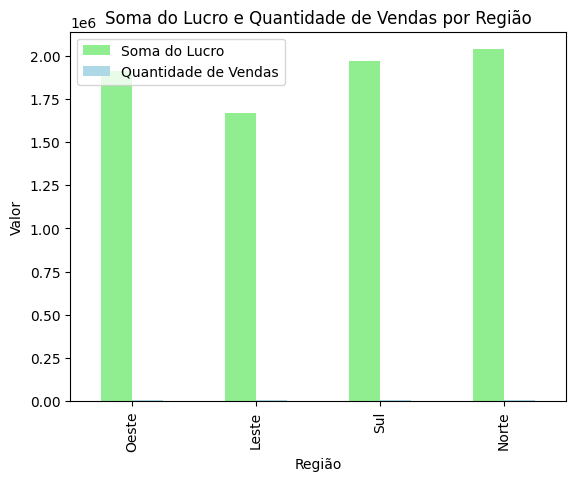

In [83]:
# Separar dados por região e calcular soma do lucro e quantidade de vendas
regioes = df['Região'].unique()
resultados = []

for regiao in regioes:
    df_regiao = df[df['Região'] == regiao]
    soma_lucro = df_regiao['Lucro'].sum()
    quantidade_vendas = df_regiao['Quantidade de Vendas'].sum()
    resultados.append([regiao, soma_lucro, quantidade_vendas])
    df_regiao.to_csv(f'regiao{regiao}.csv', index=False)

# Salvar resultados em um arquivo CSV
df_resultados = pd.DataFrame(resultados, columns=['Região', 'Soma do Lucro', 'Quantidade de Vendas'])
df_resultados.to_csv('resultados_por_regiao.csv', index=False)

# Confirmar a criação dos arquivos
print("Arquivos CSV por região e o arquivo de resultados foram criados e salvos na pasta 'regiao'.")


plt.figure(figsize=(10,6))
df_resultados.plot(kind='bar', x='Região', y=['Soma do Lucro', 'Quantidade de Vendas'], color=['lightgreen', 'lightblue'])
plt.title('Soma do Lucro e Quantidade de Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Valor')
plt.legend()
plt.show()

**Exercício 5: Novos Clientes e Expansão do Negócio**

Descubra qual região teve o maior número de novos clientes.
Filtre os dados para manter apenas os registros dessa região.
Salve os dados e envie para a bucket do GCP.
Dentro da bucket cria uma pasta chamada novos_clientes para receber os dataframes

Arquivo CSV contendo dados da região com maior número de novos clientes (Norte) foi criado e salvo na pasta 'novos_clientes'.


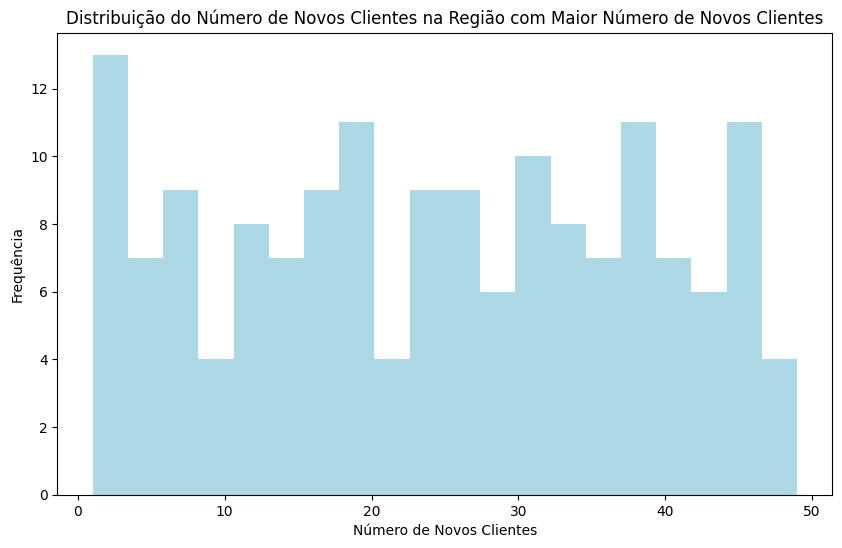

In [84]:
# Descobrir a região com maior número de novos clientes
nova_regiao = df.groupby('Região')['Novos Clientes'].sum().idxmax()

# Filtrar os dados para manter apenas os registros dessa região
df_nova_regiao = df[df['Região'] == nova_regiao]

# Salvar os dados
df_nova_regiao.to_csv('nova_regiao.csv', index=False)

# Confirmar a criação do arquivo
print(f"Arquivo CSV contendo dados da região com maior número de novos clientes ({nova_regiao}) foi criado e salvo na pasta 'novos_clientes'.")


plt.figure(figsize=(10,6))
df_nova_regiao['Novos Clientes'].plot(kind='hist', bins=20, color='lightblue')
plt.title('Distribuição do Número de Novos Clientes na Região com Maior Número de Novos Clientes')
plt.xlabel('Número de Novos Clientes')
plt.ylabel('Frequência')
plt.show()

# Insights

**1. Categorias Mais Lucrativas**

Pergunta: Quais categorias de produtos geram mais lucro?


Categoria do Produto
Alimentos      1695177
Brinquedos     1631946
Eletrônicos    1622365
Roupas         1342888
Móveis         1288416
Name: Lucro, dtype: int64


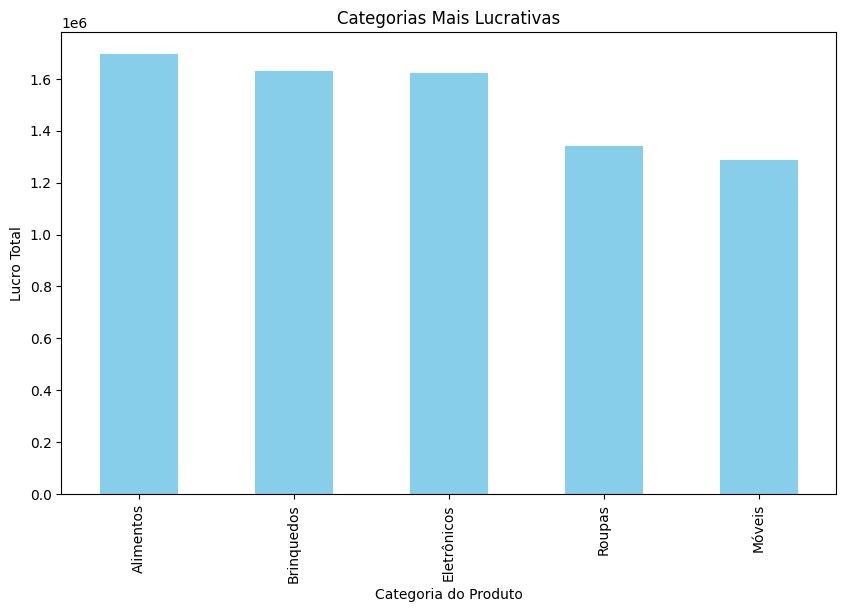

In [35]:
# Calcular o lucro total por categoria de produto
lucros_por_categoria = df.groupby('Categoria do Produto')['Lucro'].sum().sort_values(ascending=False)
print(lucros_por_categoria)


# Criar o gráfico de barras
plt.figure(figsize=(10,6))
lucros_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Categorias Mais Lucrativas')
plt.xlabel('Categoria do Produto')
plt.ylabel('Lucro Total')
plt.show()

**2. Satisfação do Cliente x Lucro**

Pergunta: Os clientes mais satisfeitos geram mais lucro?


Porcentagem do lucro gerado por clientes mais satisfeitos: 22.57%


Text(0.5, 0, 'Lucro')

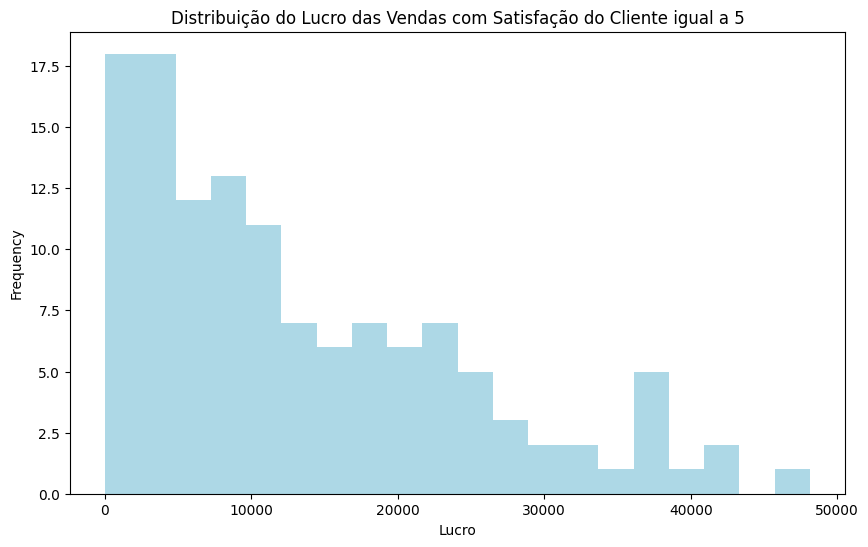

In [96]:
# Filtrar vendas com Satisfação do Cliente igual a 5
df_satisfacao5 = df[df['Satisfação do Cliente'] == 5]

# Calcular o lucro total dessas vendas
lucro_satisfacao5 = df_satisfacao5['Lucro'].sum()

# Calcular o lucro total geral
lucro_total = df['Lucro'].sum()

# Comparar os lucros
porcentagem_lucro_satisfacao5 = (lucro_satisfacao5 / lucro_total) * 100
print(f"Porcentagem do lucro gerado por clientes mais satisfeitos: {porcentagem_lucro_satisfacao5:.2f}%")

# Filtrar vendas com Satisfação do Cliente igual a 5
df_satisfacao5 = df[df['Satisfação do Cliente'] == 5]

# Calcular o lucro total dessas vendas
lucro_satisfacao5 = df_satisfacao5['Lucro'].sum()

# Calcular o lucro total geral
lucro_total = df['Lucro'].sum()


# Criar o gráfico de barras
plt.figure(figsize=(10,6))
df_satisfacao5['Lucro'].plot(kind='hist', bins=20, color='lightblue')
plt.title('Distribuição do Lucro das Vendas com Satisfação do Cliente igual a 5')
plt.xlabel('Lucro')



**3. Novos Clientes e Crescimento**

Pergunta: Quais regiões estão trazendo mais novos clientes?


Região
Norte    3881
Leste    3692
Sul      3454
Oeste    3317
Name: Novos Clientes, dtype: int64


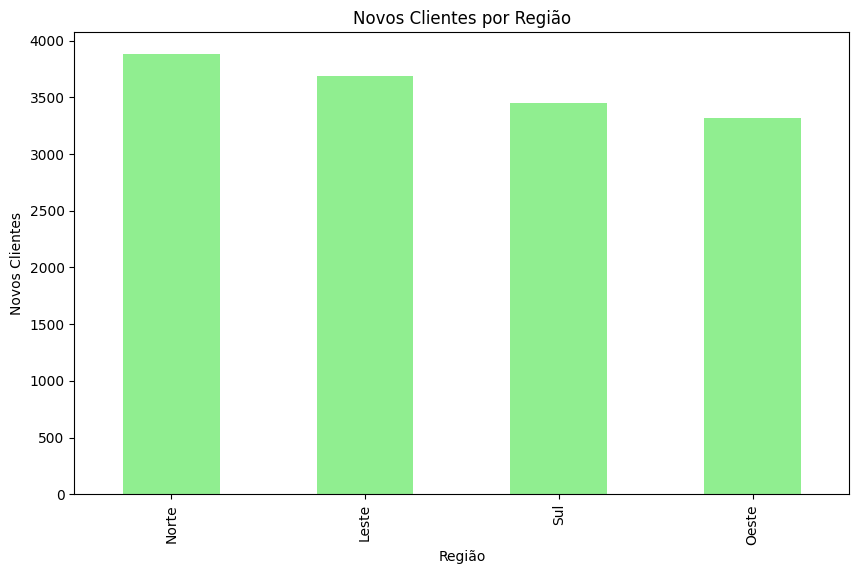

In [45]:
# Calcular o total de novos clientes por região
novos_clientes_por_regiao = df.groupby('Região')['Novos Clientes'].sum().sort_values(ascending=False)
print(novos_clientes_por_regiao)


# Criar o gráfico de barras
plt.figure(figsize=(10,6))
novos_clientes_por_regiao.plot(kind='bar', color='lightgreen')
plt.title('Novos Clientes por Região')
plt.xlabel('Região')
plt.ylabel('Novos Clientes')
plt.show()



**4. Regiões Mais Lucrativas**

Pergunta: Qual região tem maior faturamento e lucro?

Faturamento por região:
Região
Norte    4222193
Sul      3904066
Oeste    3640511
Leste    3621671
Name: Receita, dtype: int64

Lucro por região:
Região
Norte    2037041
Sul      1968494
Oeste    1908531
Leste    1666726
Name: Lucro, dtype: int64



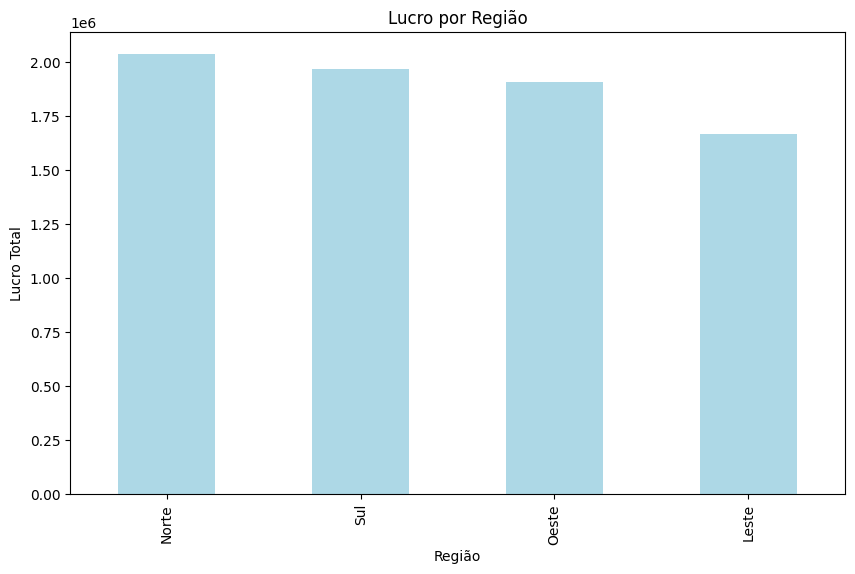

Text(0, 0.5, 'Faturamento Total')

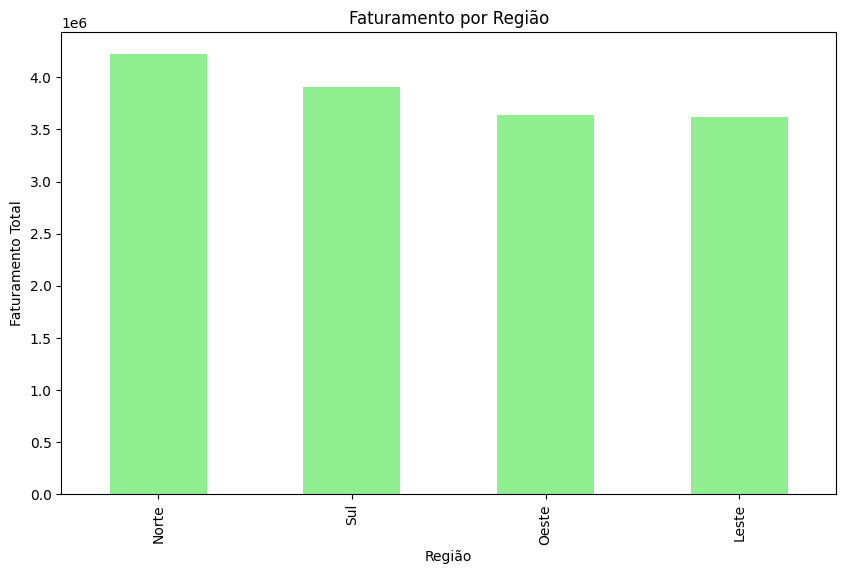

In [55]:
# Calcular o faturamento e lucro total por região
faturamento_por_regiao = df.groupby('Região')['Receita'].sum().sort_values(ascending=False)
lucro_por_regiao = df.groupby('Região')['Lucro'].sum().sort_values(ascending=False)
print(f"Faturamento por região:\n{faturamento_por_regiao}\n")
print(f"Lucro por região:\n{lucro_por_regiao}\n")



# Criar o gráfico de barras
plt.figure(figsize=(10,6))
lucro_por_regiao.plot(kind='bar', color='lightblue')
plt.title('Lucro por Região')
plt.xlabel('Região')
plt.ylabel('Lucro Total')
plt.show()

plt.figure(figsize=(10,6))
faturamento_por_regiao.plot(kind='bar', color='lightgreen')
plt.title('Faturamento por Região')
plt.xlabel('Região')
plt.ylabel('Faturamento Total')


**5. Quantidade de Vendas x Lucro**

Pergunta: Mais vendas sempre significam mais lucro?

Correlação entre quantidade de vendas e lucro: 0.02


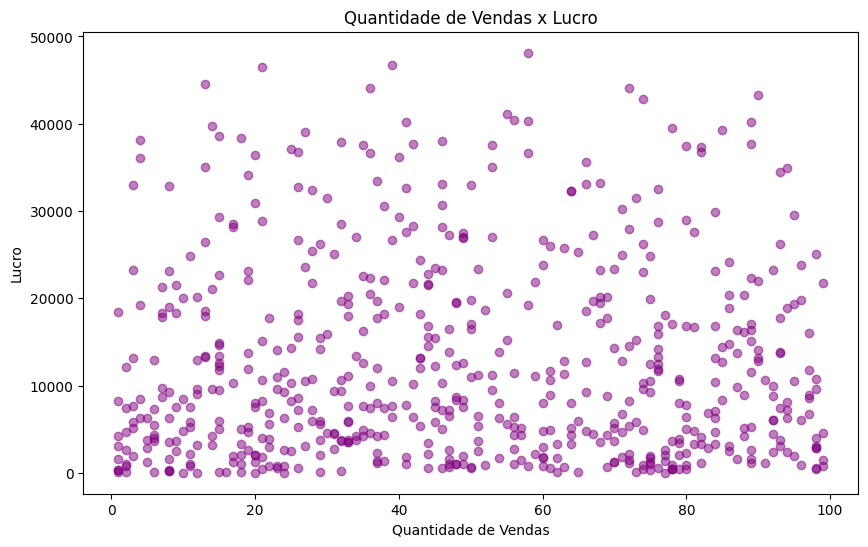

In [56]:
# Calcular a correlação entre quantidade de vendas e lucro
correlacao_vendas_lucro = df['Quantidade de Vendas'].corr(df['Lucro'])
print(f"Correlação entre quantidade de vendas e lucro: {correlacao_vendas_lucro:.2f}")


# Criar o gráfico de dispersão
plt.figure(figsize=(10,6))
plt.scatter(df['Quantidade de Vendas'], df['Lucro'], alpha=0.5, color='purple')
plt.title('Quantidade de Vendas x Lucro')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Lucro')
plt.show()


**6. Impacto de Promoções e Datas Específicas**

Pergunta: Alguma data teve um aumento significativo de vendas?


Data
2023-06-12    181
2023-09-19    180
2023-03-10    177
2023-09-25    174
2023-02-24    172
2023-07-07    170
2023-11-16    169
2023-04-11    168
2023-07-05    167
2023-09-16    166
Name: Quantidade de Vendas, dtype: int64


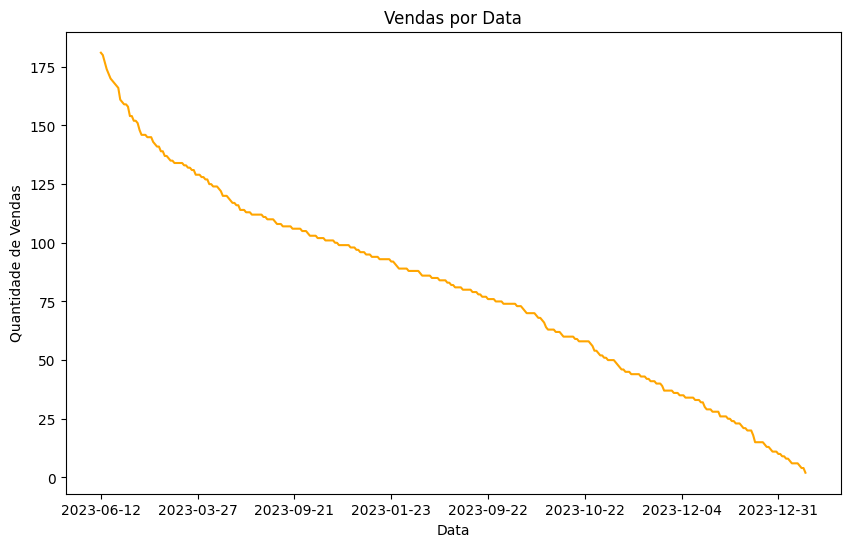

In [57]:
# Agrupar os dados por data e calcular a soma das vendas
vendas_por_data = df.groupby('Data')['Quantidade de Vendas'].sum().sort_values(ascending=False)
print(vendas_por_data.head(10))  # Exibir as 10 datas com maior aumento de vendas


# criar gráfico de linha
plt.figure(figsize=(10,6))
vendas_por_data.plot(kind='line', color='orange')
plt.title('Vendas por Data')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.show()

**7. Custos Elevados**

Pergunta: Alguma categoria está com custo muito alto?

Categoria do Produto
Brinquedos     1930154
Alimentos      1657990
Móveis         1529759
Eletrônicos    1459933
Roupas         1229813
Name: Custo, dtype: int64


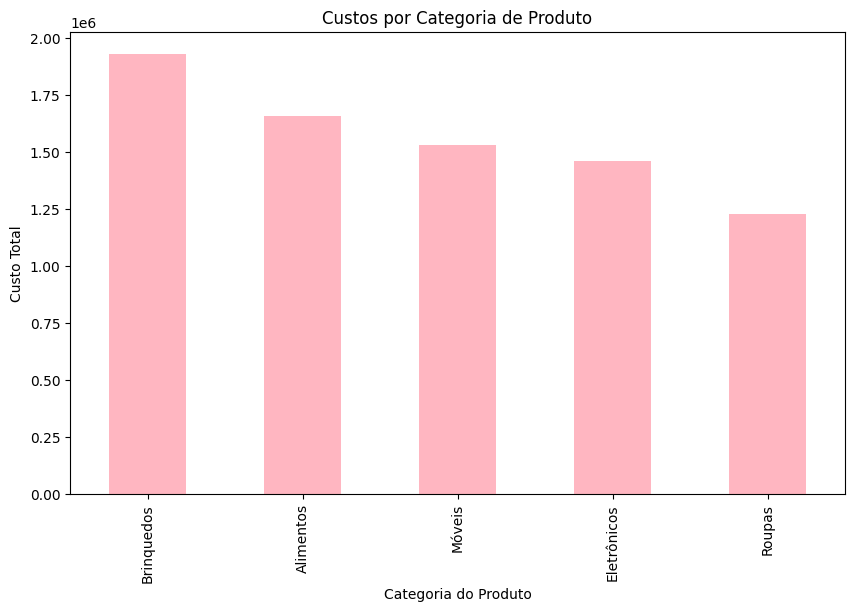

In [71]:
# Calcular o custo total por categoria de produto
custos_por_categoria = df.groupby('Categoria do Produto')['Custo'].sum().sort_values(ascending=False)
print(custos_por_categoria)

plt.figure(figsize=(10,6))
custos_por_categoria.plot(kind='bar', color='lightpink')
plt.title('Custos por Categoria de Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Custo Total')
plt.show()

**8. Impacto do Volume de Vendas no Lucro**

Pergunta: Produtos com mais unidades vendidas são os mais lucrativos?

Categoria do Produto
Alimentos      0.037057
Brinquedos    -0.062338
Eletrônicos   -0.013348
Móveis         0.135950
Roupas         0.002913
dtype: float64


<ipython-input-58-df89efbef227>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlacao_vendas_lucro_categoria = df.groupby('Categoria do Produto').apply(lambda x: x['Quantidade de Vendas'].corr(x['Lucro']))


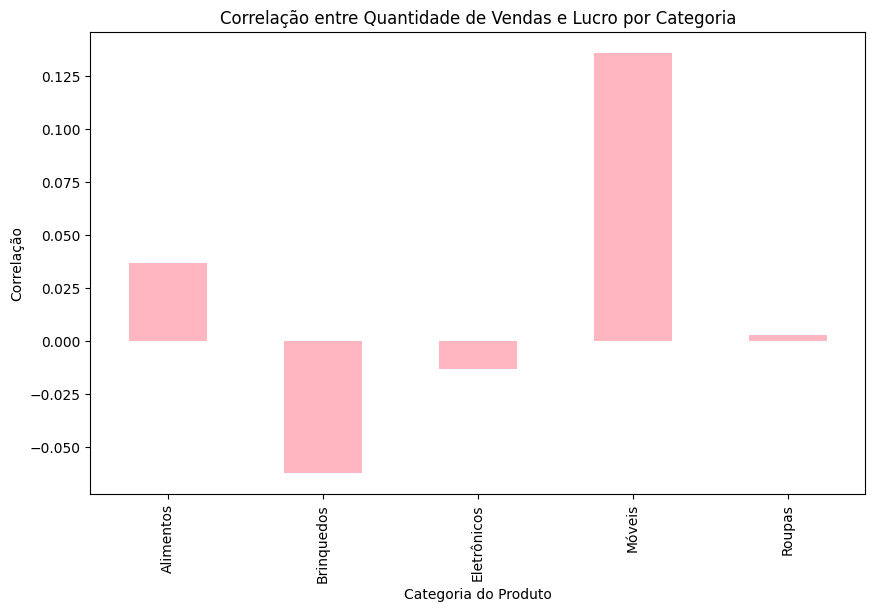

In [58]:
# Calcular a correlação entre quantidade de vendas e lucro por categoria de produto
correlacao_vendas_lucro_categoria = df.groupby('Categoria do Produto').apply(lambda x: x['Quantidade de Vendas'].corr(x['Lucro']))
print(correlacao_vendas_lucro_categoria)


# criar gráfico de correlação
plt.figure(figsize=(10,6))
correlacao_vendas_lucro_categoria.plot(kind='bar', color='lightpink')
plt.title('Correlação entre Quantidade de Vendas e Lucro por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Correlação')
plt.show()

**9. Efeito de Altas e Baixas no Lucro Diário**

Pergunta: Há dias com lucro extremamente alto ou baixo?


Data
2023-11-22    78105
2023-11-19    71276
2023-11-08    70010
2023-11-11    69814
2023-01-21    66350
2023-08-29    65544
2023-05-20    62428
2023-02-22    62420
2023-06-11    59444
2023-03-11    59074
Name: Lucro, dtype: int64
Data
2023-06-30    499
2023-01-20    376
2023-03-15    279
2023-05-05    252
2023-07-23    139
2023-12-05    104
2023-07-31     35
2023-05-24     31
2023-12-31     30
2023-12-08     18
Name: Lucro, dtype: int64


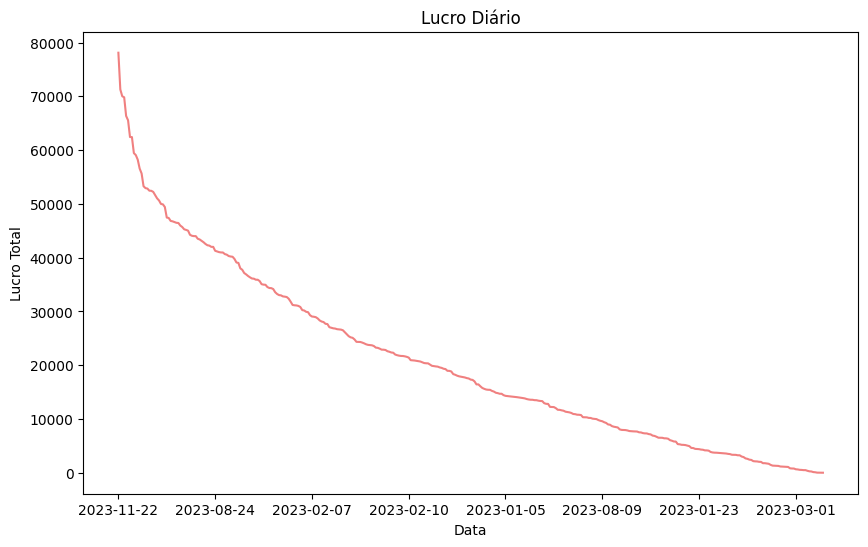

In [59]:
# Agrupar os dados por data e calcular o lucro total diário
lucro_diario = df.groupby('Data')['Lucro'].sum().sort_values(ascending=False)
print(lucro_diario.head(10))  # Exibir os 10 dias com maior lucro
print(lucro_diario.tail(10))  # Exibir os 10 dias com menor lucro


# criar gráfico
plt.figure(figsize=(10,6))
lucro_diario.plot(kind='line', color='lightcoral')
plt.title('Lucro Diário')
plt.xlabel('Data')
plt.ylabel('Lucro Total')
plt.show()

**10.  Conversão de Novos Clientes**

Pergunta: Novos clientes geram um faturamento relevante?


Novos Clientes
20    635652
1     480646
39    477638
31    473839
7     473628
35    464063
36    428013
12    403970
43    397265
21    391083
3     389166
13    386847
16    386096
24    369928
38    363150
22    362391
45    359055
2     343206
8     340872
34    339712
29    333484
44    323124
18    316213
49    314106
48    312491
15    308611
40    303422
17    281796
46    277960
26    270842
9     262980
23    258880
11    245917
4     239539
19    229473
27    226570
32    222973
33    222151
28    215788
0     215544
30    211959
10    207140
37    196609
41    192204
42    191572
14    188756
25    177136
5     164959
6     134413
47     75609
Name: Receita, dtype: int64


Text(0.5, 0, 'Novos Clientes')

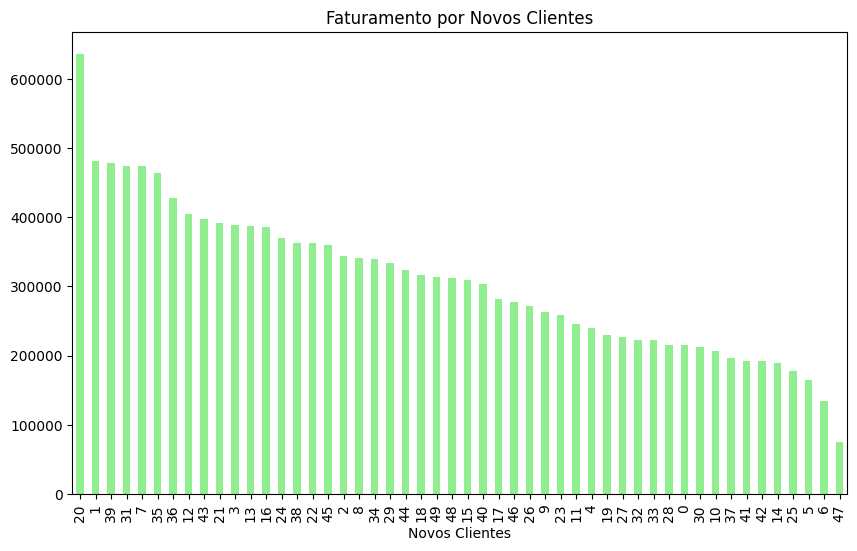

In [60]:
# Calcular o faturamento total por novos clientes
faturamento_novos_clientes = df.groupby('Novos Clientes')['Receita'].sum().sort_values(ascending=False)
print(faturamento_novos_clientes)


# criar gráfico
plt.figure(figsize=(10,6))
faturamento_novos_clientes.plot(kind='bar', color='lightgreen')
plt.title('Faturamento por Novos Clientes')
plt.xlabel('Novos Clientes')

**11. Distribuição de Lucro por Categoria e Região**

Pergunta: Alguma região tem um desempenho excepcional para certos produtos?


Região                 Leste   Norte   Oeste     Sul
Categoria do Produto                                
Alimentos             293593  381633  494265  525686
Brinquedos            332944  492566  339108  467328
Eletrônicos           440609  487549  406591  287616
Móveis                243292  383303  277527  384294
Roupas                356288  291990  391040  303570


Text(0.5, 1.0, 'Distribuição de Lucro por Categoria e Região')

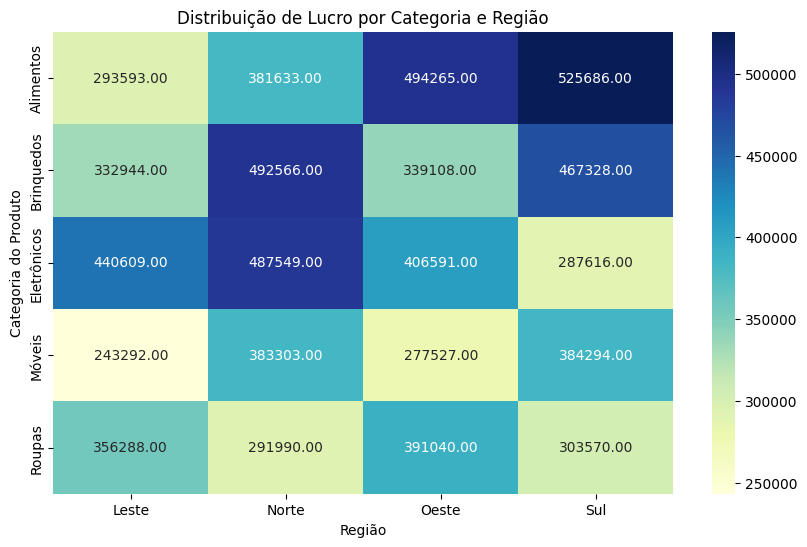

In [72]:
# Calcular o lucro total por categoria e região
lucro_categoria_regiao = df.groupby(['Categoria do Produto', 'Região'])['Lucro'].sum().unstack().fillna(0)
print(lucro_categoria_regiao)

# criar gráfico
plt.figure(figsize=(10,6))
sns.heatmap(lucro_categoria_regiao, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Distribuição de Lucro por Categoria e Região')


**12. Relação entre Receita e Satisfação do Cliente**

Pergunta: Os produtos mais vendidos são bem avaliados?


Correlação entre receita e satisfação do cliente: -0.03


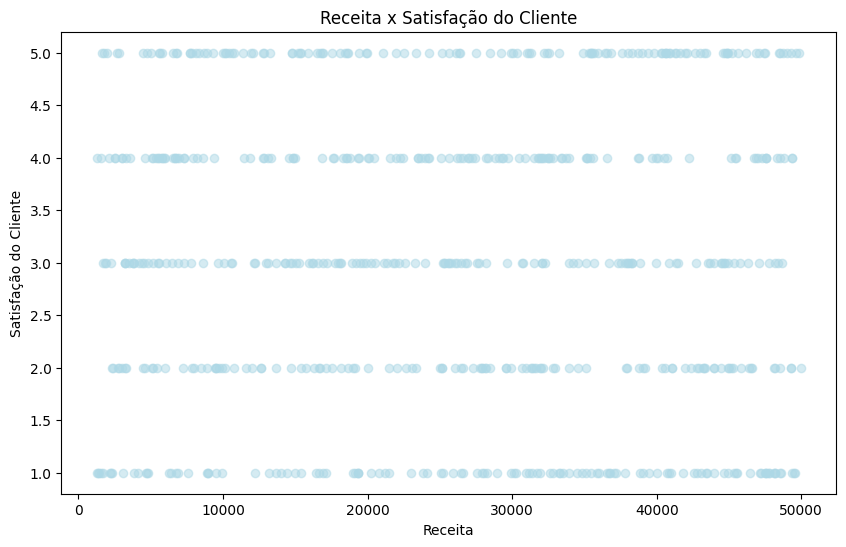

In [73]:
# Calcular a correlação entre receita e satisfação do cliente
correlacao_receita_satisfacao = df['Receita'].corr(df['Satisfação do Cliente'])
print(f"Correlação entre receita e satisfação do cliente: {correlacao_receita_satisfacao:.2f}")

# criar gráfico
plt.figure(figsize=(10,6))
plt.scatter(df['Receita'], df['Satisfação do Cliente'], alpha=0.5, color='lightblue')
plt.title('Receita x Satisfação do Cliente')
plt.xlabel('Receita')
plt.ylabel('Satisfação do Cliente')
plt.show()


**13. Regiões com Alto Custo Operacional**

Pergunta: Alguma região tem um custo muito elevado?


Região
Norte    2185152
Leste    1954945
Sul      1935572
Oeste    1731980
Name: Custo, dtype: int64


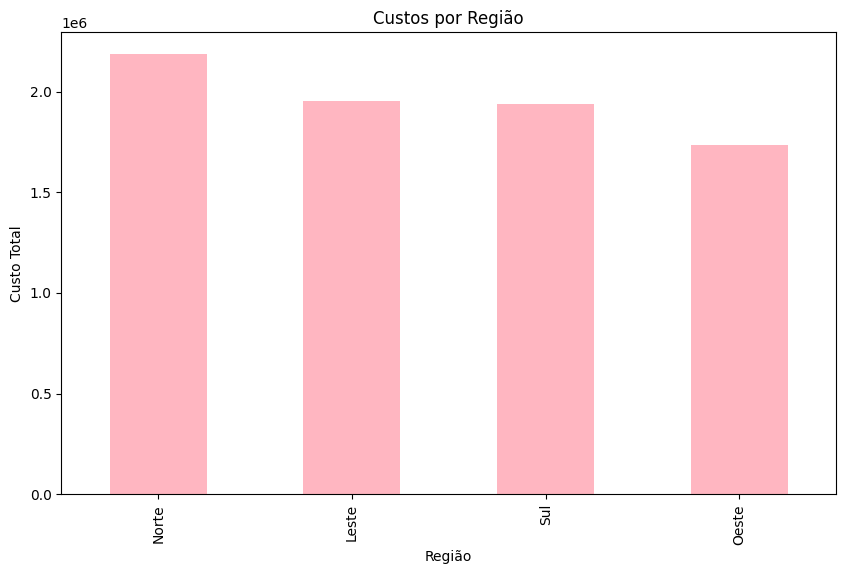

In [74]:
# Calcular o custo total por região
custos_por_regiao = df.groupby('Região')['Custo'].sum().sort_values(ascending=False)
print(custos_por_regiao)

# criar gráfico
plt.figure(figsize=(10,6))
custos_por_regiao.plot(kind='bar', color='lightpink')
plt.title('Custos por Região')
plt.xlabel('Região')
plt.ylabel('Custo Total')
plt.show()


**14. Proporção de Custo x Receita por Categoria**

Pergunta: Quais categorias têm os melhores e piores retornos sobre o investimento?


Categoria do Produto
Eletrônicos    0.473651
Roupas         0.478024
Alimentos      0.494455
Brinquedos     0.541858
Móveis         0.542819
dtype: float64


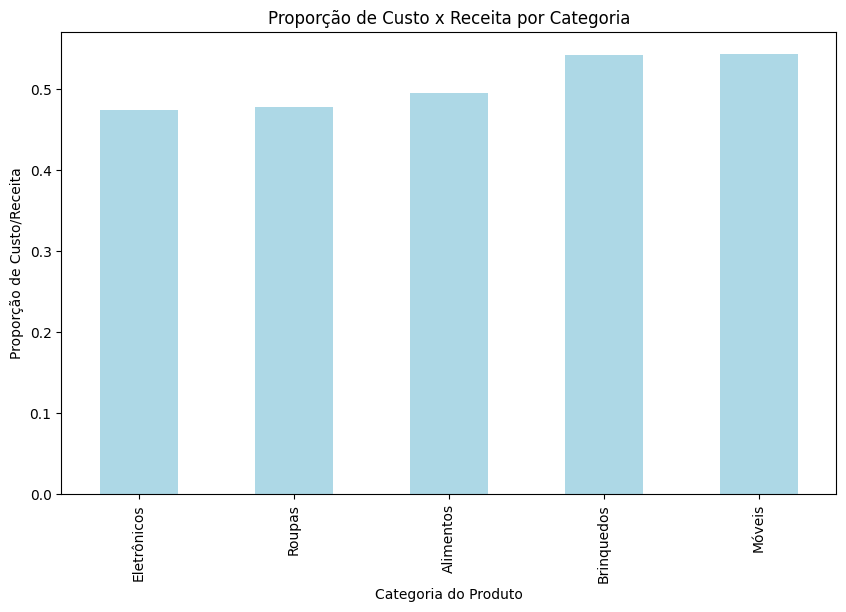

In [75]:
# Calcular a proporção de custo por receita para cada categoria de produto
proporcao_custo_receita = (df.groupby('Categoria do Produto')['Custo'].sum() / df.groupby('Categoria do Produto')['Receita'].sum()).sort_values()
print(proporcao_custo_receita)

# criar gráfico
plt.figure(figsize=(10,6))
proporcao_custo_receita.plot(kind='bar', color='lightblue')
plt.title('Proporção de Custo x Receita por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Proporção de Custo/Receita')
plt.show()


**15. Concentração de Vendas por Região**

Pergunta: Alguma região domina as vendas de certos produtos?

Região                Leste  Norte  Oeste   Sul
Categoria do Produto                           
Alimentos              1404   1099   1876  1882
Brinquedos             1280   2057   1513  1332
Eletrônicos            1655   2358   1414   826
Móveis                 1690   1639   1073  1546
Roupas                 1313   1171   1435   771


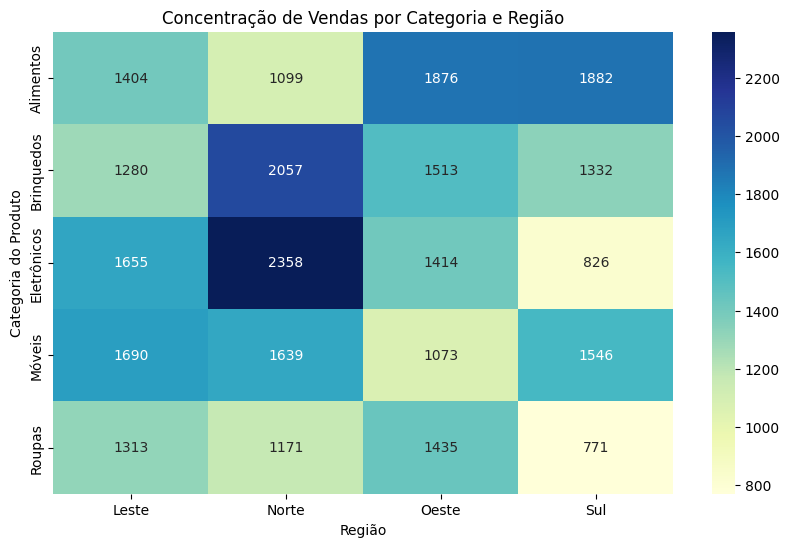

In [77]:
# Calcular a quantidade total de vendas por categoria e região
vendas_categoria_regiao = df.groupby(['Categoria do Produto', 'Região'])['Quantidade de Vendas'].sum().unstack().fillna(0)
print(vendas_categoria_regiao)


# criar gráfico
plt.figure(figsize=(10,6))
sns.heatmap(vendas_categoria_regiao, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Concentração de Vendas por Categoria e Região')
plt.show()

**16. Análise de Tendências por Categoria**

Pergunta: Alguma categoria está crescendo ou diminuindo em vendas ao longo do tempo?


Categoria do Produto
Brinquedos     inf
Móveis        -1.0
Roupas        -1.0
Alimentos      NaN
Eletrônicos    NaN
dtype: float64


<ipython-input-79-c0f07e40bff9>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  taxa_crescimento_categoria = vendas_categoria_tempo.apply(lambda x: (x[-1] - x[0]) / x[0], axis=0).sort_values(ascending=False)
<ipython-input-79-c0f07e40bff9>:5: RuntimeWarning: invalid value encountered in scalar divide
  taxa_crescimento_categoria = vendas_categoria_tempo.apply(lambda x: (x[-1] - x[0]) / x[0], axis=0).sort_values(ascending=False)
<ipython-input-79-c0f07e40bff9>:5: RuntimeWarning: divide by zero encountered in scalar divide
  taxa_crescimento_categoria = vendas_categoria_tempo.apply(lambda x: (x[-1] - x[0]) / x[0], axis=0).sort_values(ascending=False)


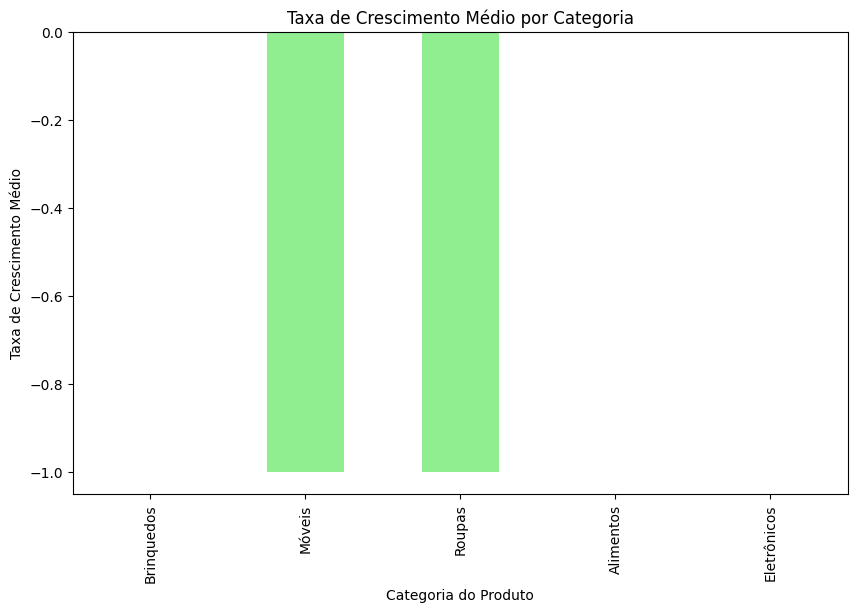

In [79]:
# Agrupar os dados por categoria e data e calcular a quantidade total de vendas
vendas_categoria_tempo = df.groupby(['Categoria do Produto', 'Data'])['Quantidade de Vendas'].sum().unstack().fillna(0).T

# Calcular a taxa de crescimento médio por categoria
taxa_crescimento_categoria = vendas_categoria_tempo.apply(lambda x: (x[-1] - x[0]) / x[0], axis=0).sort_values(ascending=False)
print(taxa_crescimento_categoria)

# criar gráfico
plt.figure(figsize=(10,6))
taxa_crescimento_categoria.plot(kind='bar', color='lightgreen')
plt.title('Taxa de Crescimento Médio por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Taxa de Crescimento Médio')
plt.show()


# GCP

In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id='analisedados-433019'
!gcloud config set project {project_id}


from google.cloud import storage
client = storage.Client()
bucket_name='magazine-capivara-tefi'
bucket=client.bucket(bucket_name)

df.to_csv('capivara-bruta.csv',index=False)
destination_blob_name='dados-nao-tratados/capivara-bruta.csv'
source_file_name='capivara-bruta.csv'
blob= bucket.blob(destination_blob_name)
blob.upload_from_filename(source_file_name)
